# **My First Machine Learning Project Part 1: Getting Started**

## **1. Introduction**

Before everything else, you should know what dataset you are going to use and the questions you are trying to answer using the data set with the help of machine learning.

A typical machine learning project has the following steps:

1. Get the data: Explore it to understand the task at hand
2. Preprocess the data
3. Decide what kind of machine learning model is required depending on the task at hand
4. Initialize the model with the necessary parameters
5. Train the model(s)
6. Evaluate the model(s) with a test dataset
7. Deploy the model if the performance is good enough, Otherwise go back to 2 or 3 or 4 as appropriate.

## **2. Our Dataset**

For our first machine learning project, we are trying to predict the type of Iris flower, using some measurements of the flower. There are 3 types of Iris flowers we are considering in our dataset

1. Iris Versicolor
2. Iris Setosa
3. Iris Virginica

Those are the 'labels' of our machine learning task.

**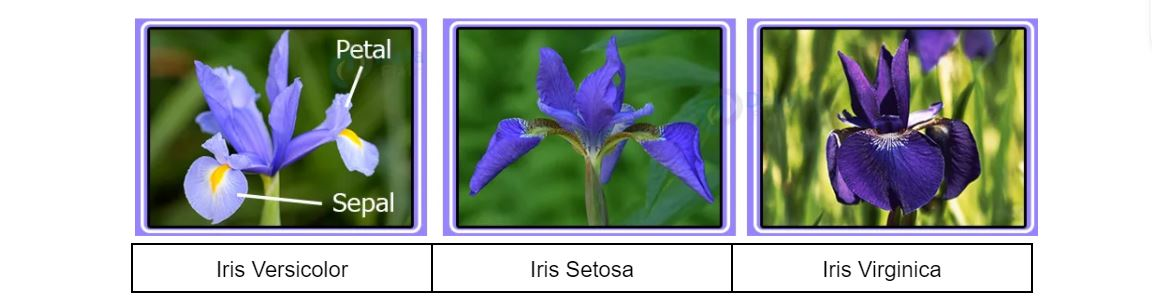**

This dataset was prepared by R. A. Fischer, way back in 1936! It doesn’t contain photos of flowers. Instead, it contains the following measurements of individual flowers:

1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

Those are the attributes or features of our machine learning task. All measurements are in centimeters and the dataset contains such measurements for 150 flowers belonging to the above three subtypes of Iris. It’s one of the most popular datasets for developing and evaluating machine learning algorithms.

## **3. Getting started with your Python Environment**

You can use your favorite python IDE for your machine learning project. However it's important to note that Google Colab is increasingly popular among ML enthusiasts, mainly because it provides a hassle free rapid start. It is a Jupyter notebook-like programming environment with a large number of standard libraries preinstalled. It also allows you to run your code either on your local machine or in the cloud, allowing you to leverage GPU based computation for better performance for some algorithms.

- https://colab.research.google.com

Once you open your editor, you can start your python script with the necessary packages imported. The following code block shows some of the typical python libraries used for data handling, plotting and visualization

**Importing Necessary Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at some of the above libraries in a bit more detail

- **NumPy** offers comprehensive mathematical functions, random number generators, linear algebra routines etc. It is one of the fundamental scientific libraries.

- **Pandas** is a fast, powerful, flexible and easy to use library for data analysis and manipulation.

- **Matplotlib** is a comprehensive library for creating static, animated and interactive visualizations.

- **Seaborn** is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

The command **`%matplotlib inline`** allows the plots to be visualized directly inside the python notebook you are coding on.

Apart from the above, we will also be using Scikit-learn, which is a comprehensive machine learning library that includes implementations of several machine learning algorithms and support functions for training and evaluating machine learning models.

## **4. Exploring the data**

Let’s get our hands on the dataset and see what's in there!

**Load the data**

The following code can be used to download the data and load it into a data structure called a DataFrame defined in

In [2]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = col_name)

Pandas. provides a function called **`head()`** to print the top five rows of the **`dataset.print(dataset.shape)`**

In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.max()

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
class           Iris-virginica
dtype: object

***Looking at the top five rows of the dataset***

Pandas provides a function called **`head(`)** to print the top five rows of the dataset.

In [5]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Look at some summary statistics of the dataset**

Pandas provides a function called **`describe()`** to compute and print out summary statistics for each class, such as the number of data points, mean value, standard deviation, minimum value, maximum value and the quartiles.

In [6]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**See what data types we are dealing with, and the memory usage of the dataset**

Pandas provides a function called **`info()`** that prints out the data type of each column andthe memory usage.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**The number of classes and the number of examples**

Pandas provides a function called `value_counts()` to show us the number of examples in each class.

The `value_counts()` functions should be called on the column that contains the class labels. That is obtained by `dataset['class']`, on which the `value_counts()` function should be called.

In [8]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Violin Plots**

Sometimes, the summary statistics such as mean, standard deviation and median are not enough to understand a dataset. Are the values clustered around the median? Are they spread out normally or skewed to one side? A **violin plot** can help you to answer these questions. This can show you peaks of the data and visualizes the distribution of the dataset.

The best way to understand what a **violin plot** shows is to try it out on our dataset.

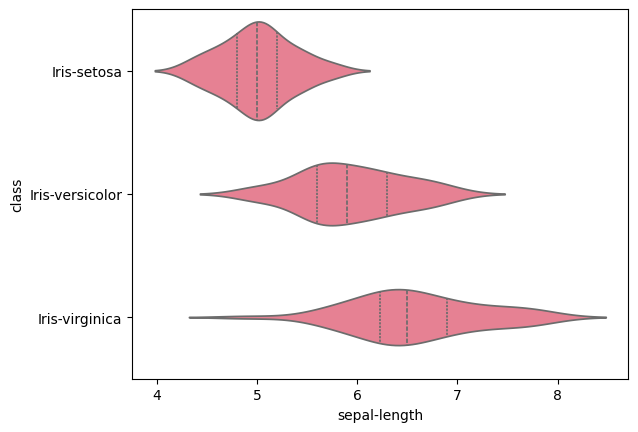

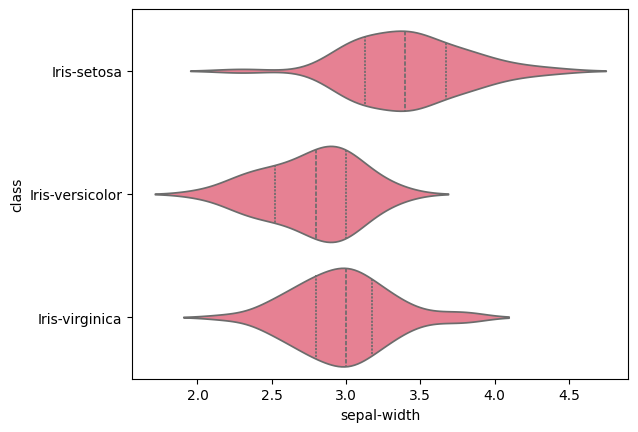

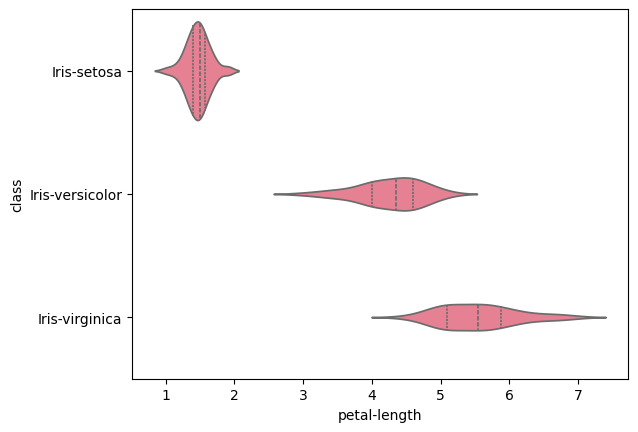

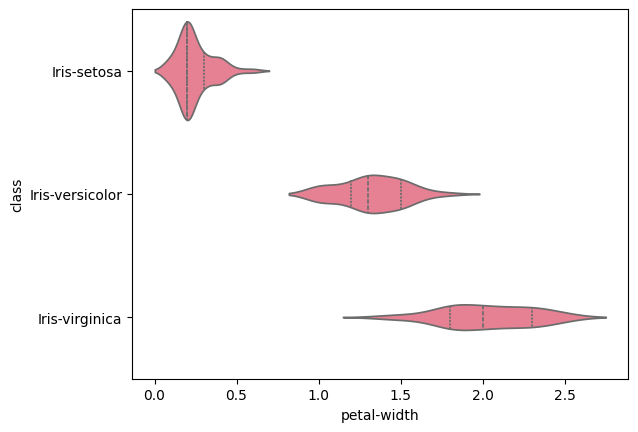

In [9]:
# Violin Plot
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

Let's focus on the top right violin plot that shows the distributions of the attribute **“petal length”**. We can observe that for Iris Setosa, the petal length is distributed between 1 cm and 2 cm with a larger proportion of the flowers having a measurement near the median value. The other two types of Iris have a flatter and longer distributions of petal length with Iris Virginica having the longest distribution with a long thin tail.

**Correlation Heatmap**

Correlation between two attributes tells you about the interdependency between the two attributes. A correlation heatmap shows a 2D visualization of such interdependencies between each pair of attributes. Whether two attributes are highly correlated or not is reflected by the colors of the heatmap. The following code block can be used to plot the correlation heatmap for our dataset.

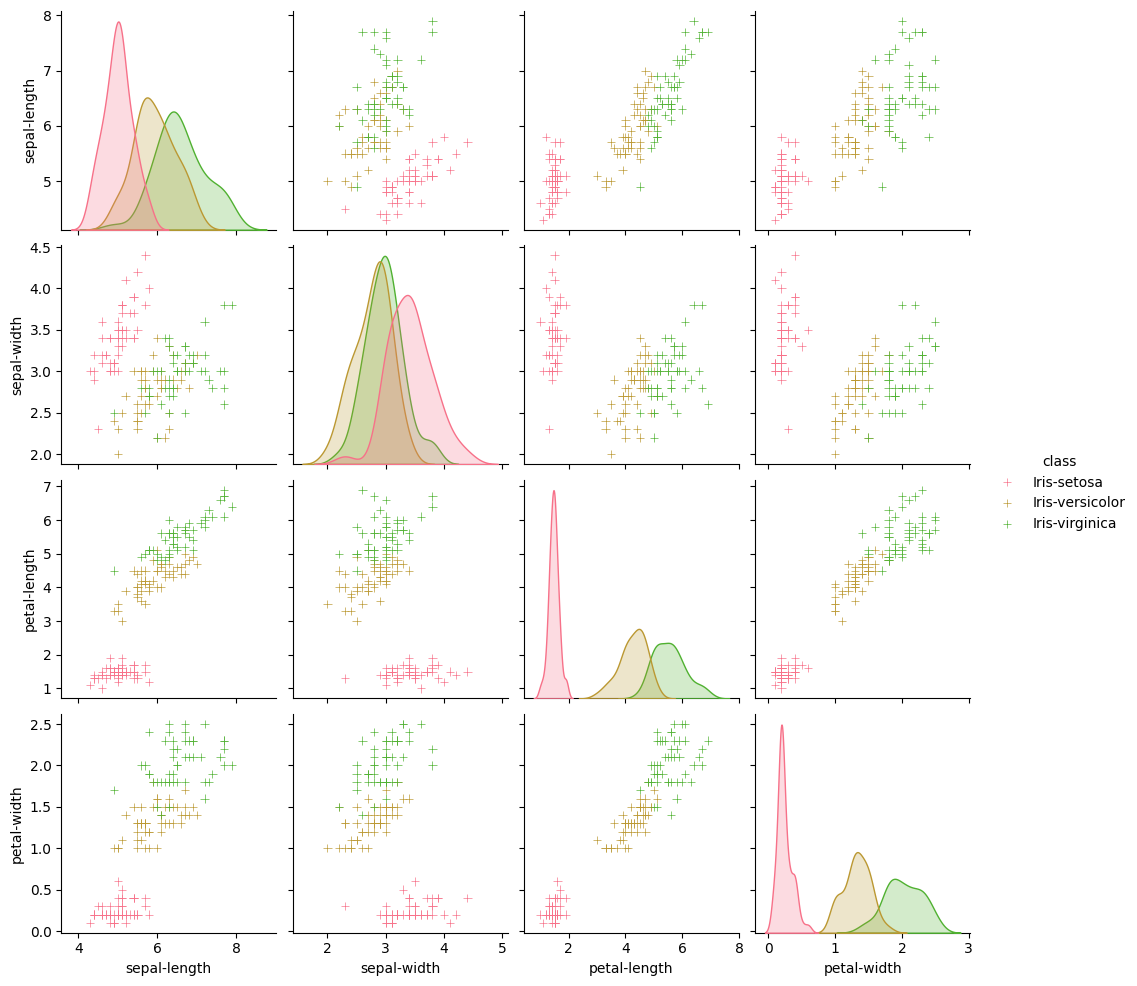

In [10]:
# Pair Plot
sns.pairplot(dataset, hue='class', markers='+')

plt.show()

If you execute this on Google Colab or any other notebook such as Jupyter notebooks this is how the output should look.

**Correlation Heatmap**

In the first line we specify the size of the figure, in inches. In this case the width is 7 inches and the height is 5 inches. Then we call the heatmap function of Seaborn, to which we pass the correlation matrix of the attributes of the dataset. The calculation of the correlation matrix is achieved by calling the `corr()` function on the dataset. The cmap variable sets the type of color map we would like to see on the heatmap. Here we have specified `cmap='cubehelix_r'`. Have a look at the documentation of the Seaborn library to find out the other kinds of color maps that are available for producing a colorful correlation heatmap.



<ipython-input-40-42416a67bb00>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='jet')


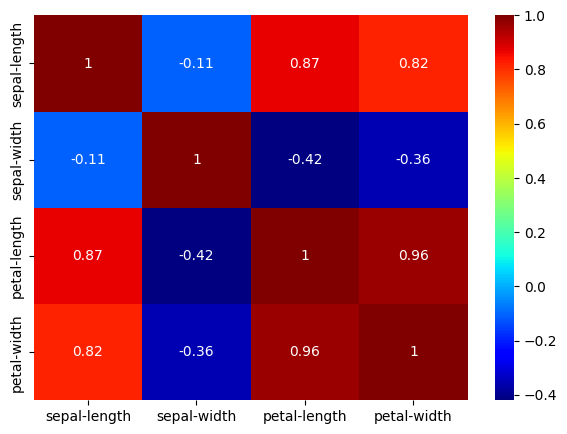

In [40]:
# Correlation Heatmap
plt.figure(figsize=(7,5))

sns.heatmap(dataset.corr(), annot=True, cmap='jet')

plt.show()

**Summary**

In this lesson we learned how to get started with a **Machine Learning Project** by loading a dataset and exploring the data to increase our understanding of the dataset. We got to know some commonly used **Python Libraries** such as **NumPy**, **Pandas**, **Matplotlib** and **Seaborn**. We also learned how to compute, print and visualize insightful information about our dataset. In the next lesson, we will learn how to build a machine learning model to classify a new set of readings of a new **Iris flower** into the correct subtype.

# **My First ML Project - Part 2 (Build ML Model)**

In this section we will continue to build the **ML project** that we started in the previous section. In the last section we explored the data to see if it is is suitable to build a ML model and in this section we will build a ML model using the avaialle Python libraries.

**1. Split the Dataset**

Before you build the model you need to think about how you are going to test the model that you build so that you can be sure that the model is giving you reliable answers to the question you are asking based on the training data given to it. The only way to test the model is to use some of the traning data samples as test samples. So the first thing you should do is split the data into a training dataset and a test dataset. You should not use the same dataset for training and testing.

In [21]:
# Drop the column that contains the class labels
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Split: 80% for training. 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X shape: (150, 4) | y shape: (150,) 


In the given code we first remove the class from the dataset using the drop and create X. And then we create y by taking only the labels. Next we split the sets X and y into X-train and X_test, and the class labels into y_train and y_test. We are requesting the split to be done so that we take 20% of the data for testing and leave the balance 80% for training. We are also asking the data to be randomly split. Not to just take the first 20% or the last 20% for testing. Also note that we are importing a libraray from sckit learn to do the data spliting.

If you run the code you should see an output similar to what is given below.

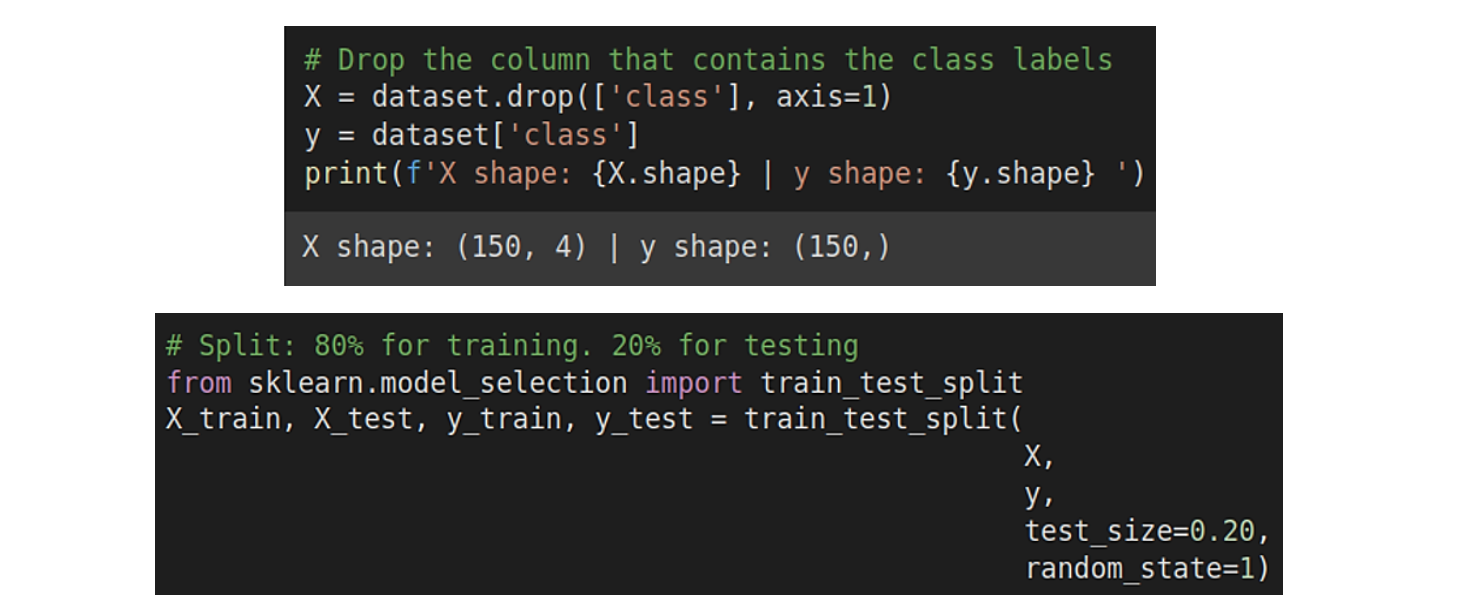

Follwowing diagram shows how the data set is broken into four different sets named X_train, X_test and y_train, y_test. Note that in the diagram there are only 5 samples but in the dataset we had 150 samples and the train set now has 80% ie 120 samples and 30 (20%) samples in the test set.



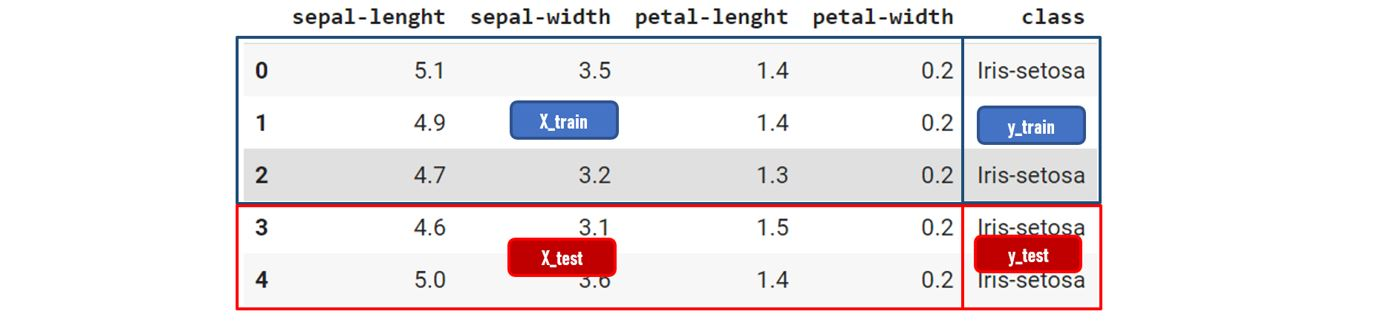

**2. Train Classifier**

Now let us look at how we could build a Machine Learning model using the trainin dataset that we have. There are a lot of Machine Learning models that we can use in the scikit learn library, but for this project we will use a modle called the **Support Vector Machine (SVM)**.

In [23]:
# Support vector machine algorithm
from sklearn.svm import SVC

svn = SVC()
svn.fit(X_train, y_train)

SVC()

In the given code we are first importing **Support Vector Classifier (SVC)** from the **svm** library in scikit learn. Then we are creating our own SVC classifier object named svn. After that we ask the svn object to fit the trainng data and build a classificaition model (training).

If you run the code you should see an output similar to what is given above.

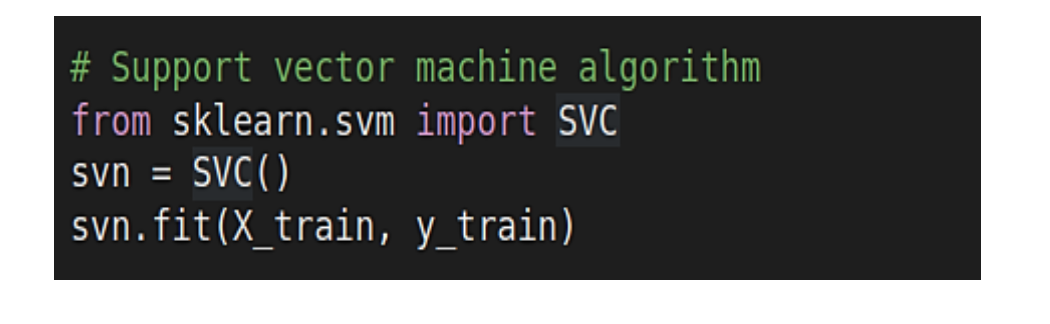

**3. Evaluating Classifier**

Now you need to evaluate the classifier to make sure it is working the way we want it to work and giving us mostly correct answers. Also, by evaluating the classifier, we can try to improve the classifier by changing some of the things (design decisions) that we took in the process of building this classifier, including the data pre-processing steps we took. Evaluation allows us to check how well we have done the Machine Learning. Using the `accuracy_score` function provided by **sklearn.metrics** the classifier's performance is evaluated.

In [25]:
# Model evaluation

# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9666666666666667

If you run the code you should see an output similar to what is given below. In this code we are first asking the model that we created named `svn` to do the predictions (classifications) for us for the `X_test` set and create predictions object. Then we are asking the results (predictions) to be evaluated aginast the correct answers we had in the original dataset in `y_test`.

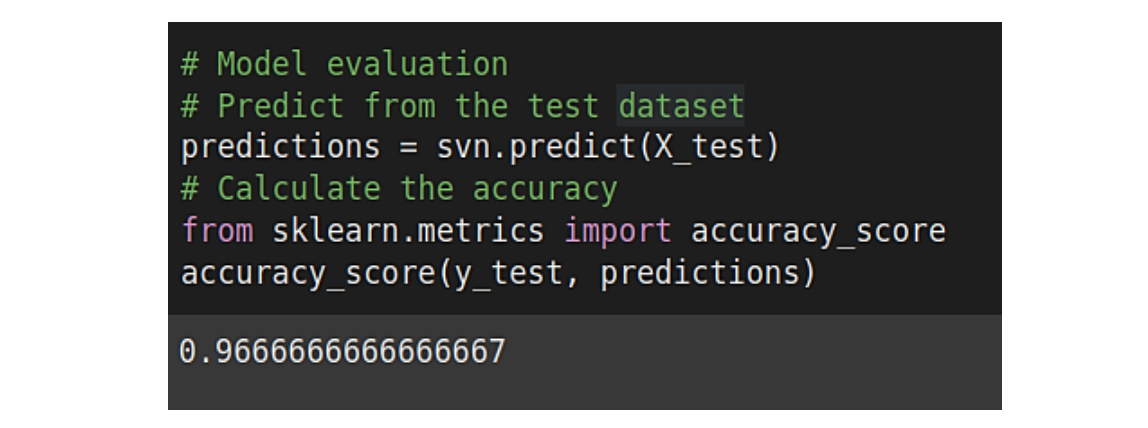

**4. Detailed Evaluation with Precision, Recall and F1-Score**

There are multiple ways of evaluating a classification model. One of the easiest and simplest methods is to look at the accuracy calculated by dividing the correct numbers of labels we got from the total number of samples we tested. Other methods to evaluate would show us different aspects of the model quality. We have to decide on the most suitable evaluation method depending on the problem we are trying to solve. We will also check the Precision, Recall, and F1-Score in this example.

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In the above code, we execute a ```classification_report``` function that is imported from `sklearn.metrics` and give the correct labels (`y_test`) and the labels predicted by our ML model (predictions). If you run the code you should see an output similar to what is given below.

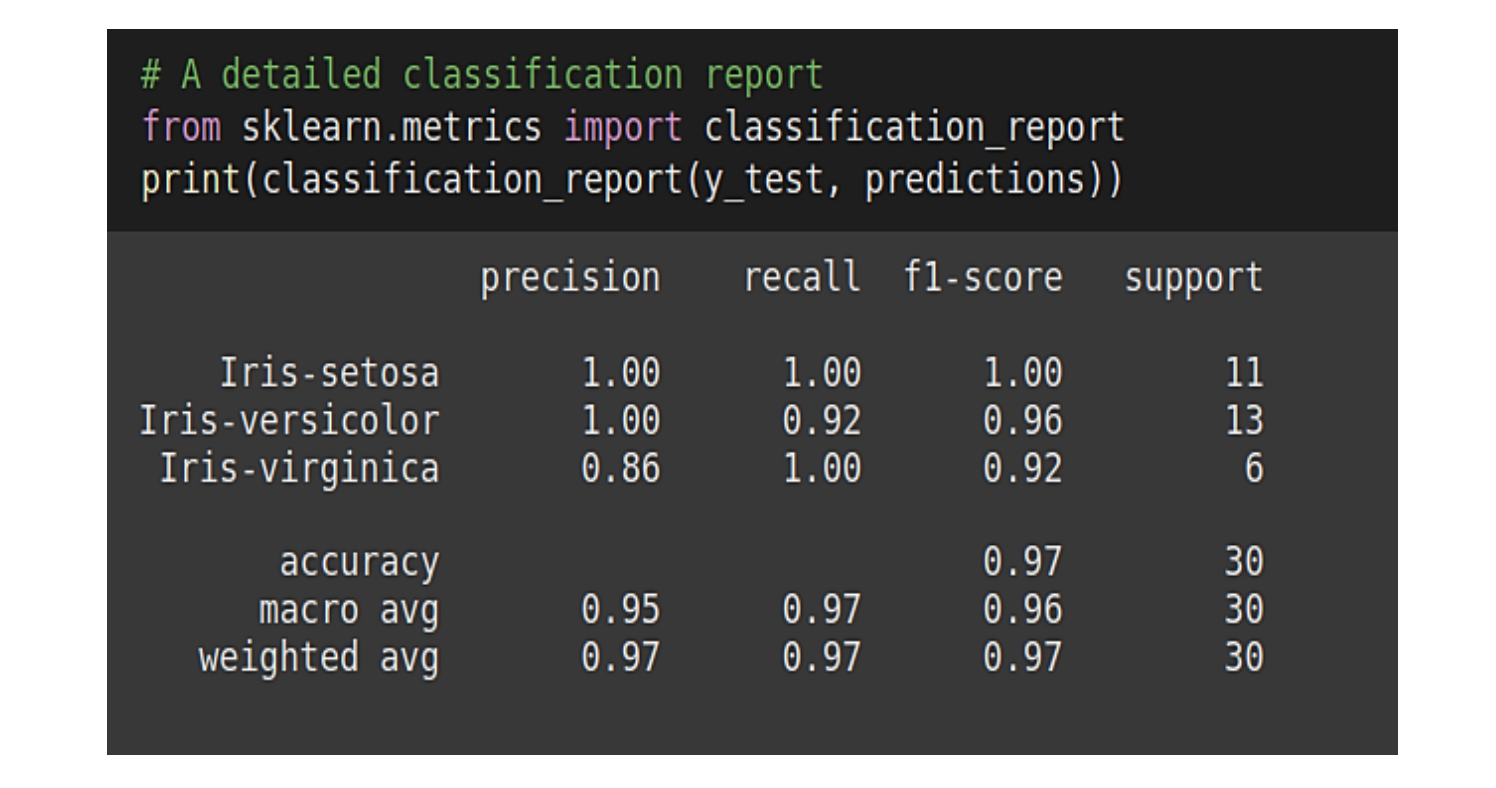

**5. Error Analysis with the Confusion Matrix**

In a multi-label classification problem like the one that we are solving, we can also check what classifications were incorrectly labeled by the classifier so that we may be able to give more attention to that class label in modifying our ML model. The summary table of True Label against the Predicted Label is called the **Confusion Matrix**.

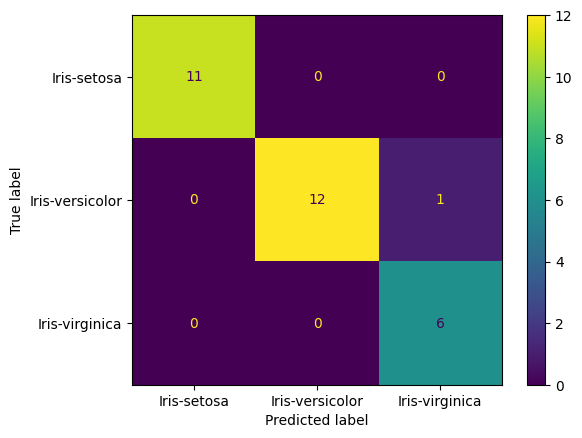

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=svn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svn.classes_)
disp.plot()
plt.show()

If you run the code, you should see an output similar to what is given below. In the **diagram**, we see how the different labels have been predicted. For example, we see that most of the labels are predicted correctly as the numbers on the diagonal are high. We also see that one **iris-versicolor** was incorrectly labeled as **Iris-verginica**. Also, this diagram uses a **heat map** to show us the numbers with the color intensity. The more significant numbers are shown in **yellow**, and the smaller numbers are shown with a **darker blue**.

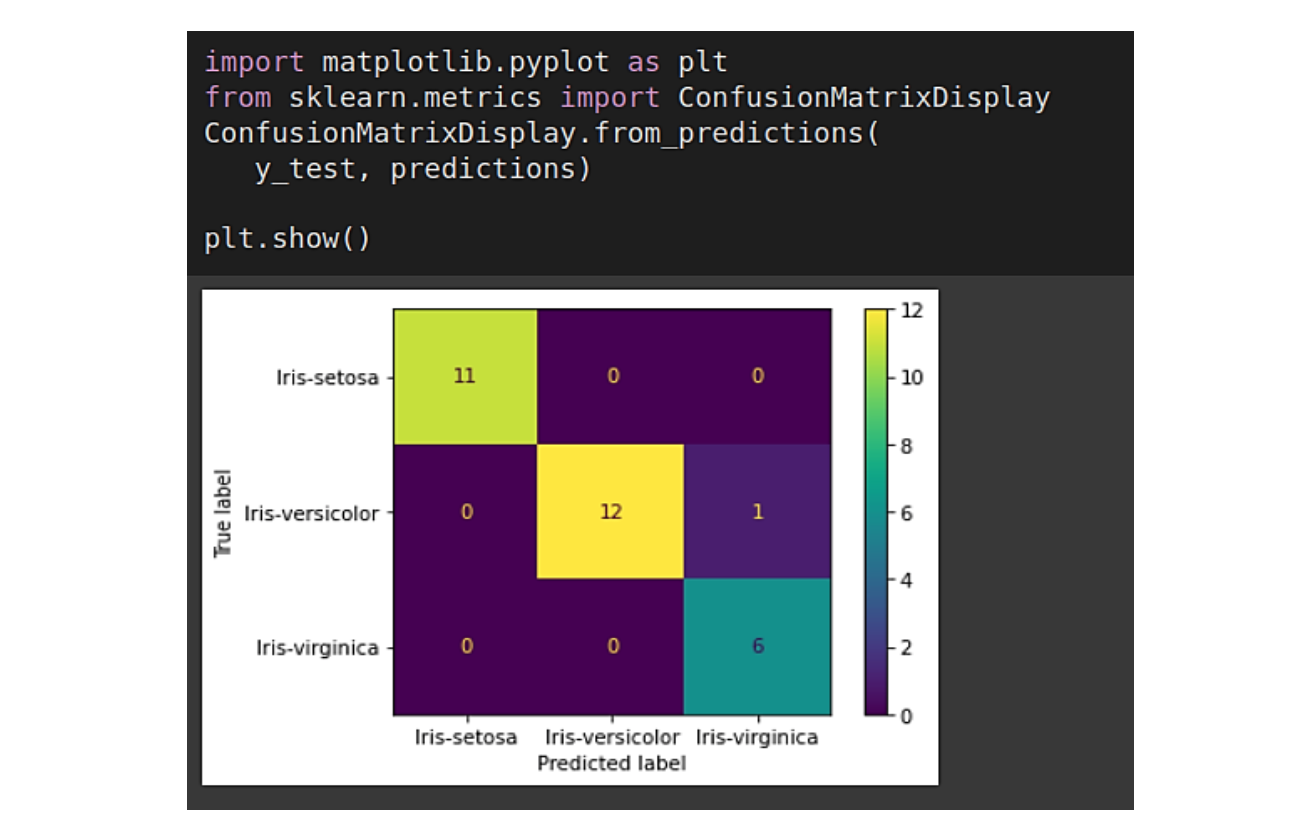

**6. Saving the ML Model**

Typically when we train a model with a large number of data points, it may take a long time, and once we build a good ML model, we would like to keep it and use it later rather than having to train the model again.

The **pickle** module is used to *serialize/deserialize* a python object structure so that it can be saved as a binary and loaded and used later. In this example, Serialize means converting the model to a form that can be stored in a storage media, and Deserializing is the process of reading the model from storage and putting it into a form that can be executed in the Python environment that it was built. This is similar to writing a file and reading it later.

In [34]:
# Save the model
import pickle

with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

If you run the code, you should see an output similar to what is given below. In this code we are importing pickle and saving the model using pickle.

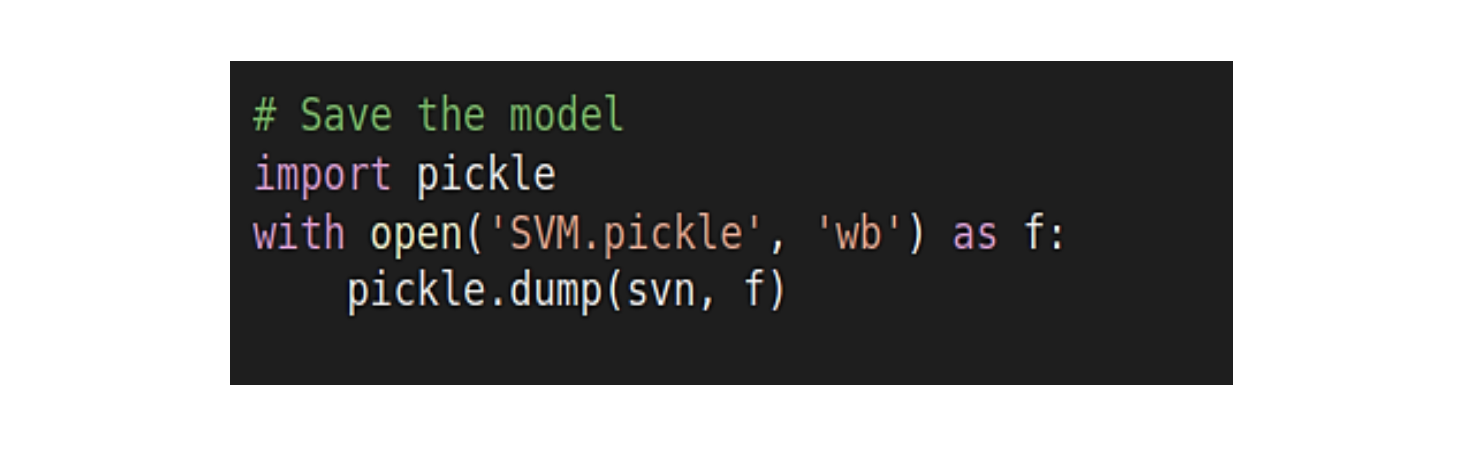

**7. Loading and Using a Saved Model to Classify New Data**

Now that we have built a model and saved it, we can use it to predict a set of samples with unknown lables.

In [36]:
with open('SVM.pickle', 'rb') as f:
     model = pickle.load(f)

model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

If you run the code, you should see an output similar to what is given below. In this code, we load the saved model using **pickle** and then predict the set to test cases in `X_Test`.

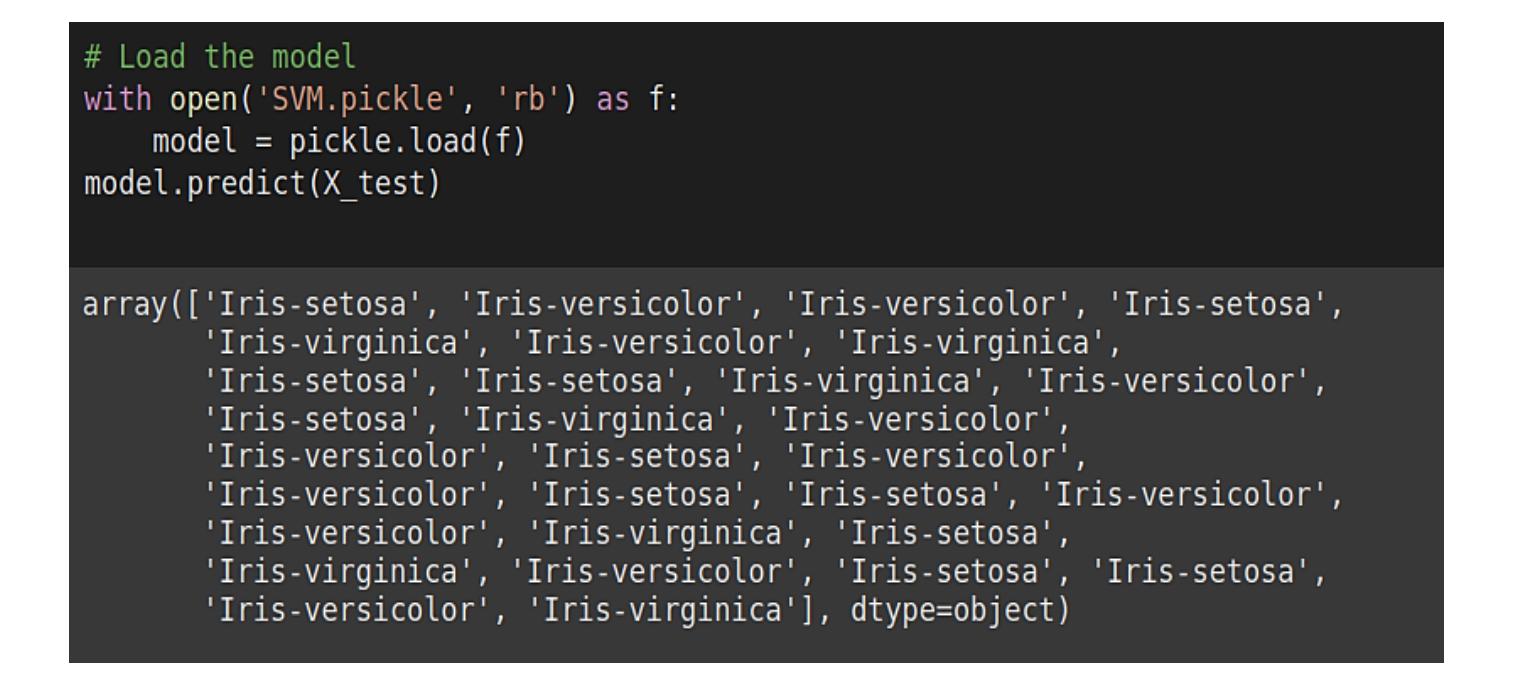

You should be able to check all the code that was introduced in this section by playing around with the following below Notwbook Codes. Try to see if you could write the lines of code required to output the labels predicted by your ML model for the testset.

X shape: (150, 4) | y shape: (150,) 
0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



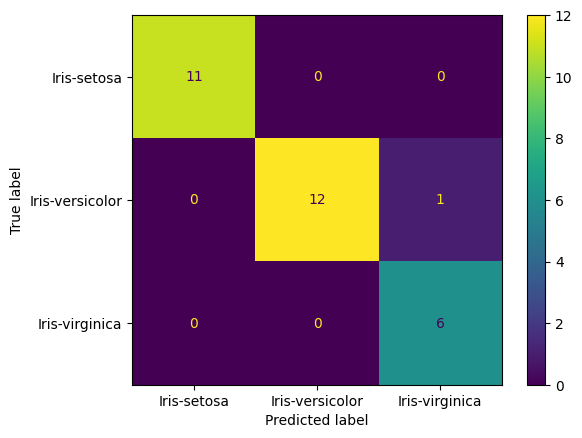

In [39]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

# LOAD THE DATA
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = col_name)

# SPLIT the Data for Evaluation
# Drop the column that contains the class labels
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Split: 80% for training. 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)
# TRAIN THE ML MODEL
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

# EVALUATE MODEL
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=svn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)

disp.plot()
plt.show()

**Summary**

In this section we learnt how to build our own ML model using the avaialle Python libraries. And also we learnt how to evaluate our model, and predict the labels for an unknown set of data points.